# Loops, groups and repetitive tasks

Sometimes you need to do things again and again.

## Selecting things

Let's say we have a lot of pages that all look like this:

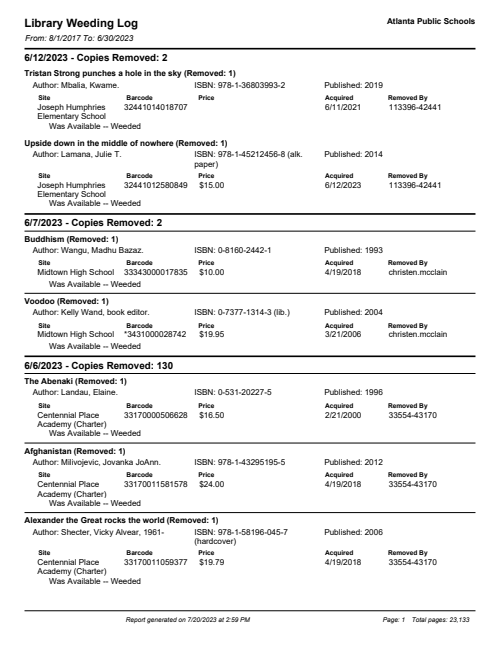

In [1]:
from natural_pdf import PDF

# Path to sample PDF
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/Atlanta_Public_Schools_GA_sample.pdf")

# Display the first page
page = pdf.pages[0]
page.show(width=500)

We can find all of the book titles by finding **(Removed:** on the page...

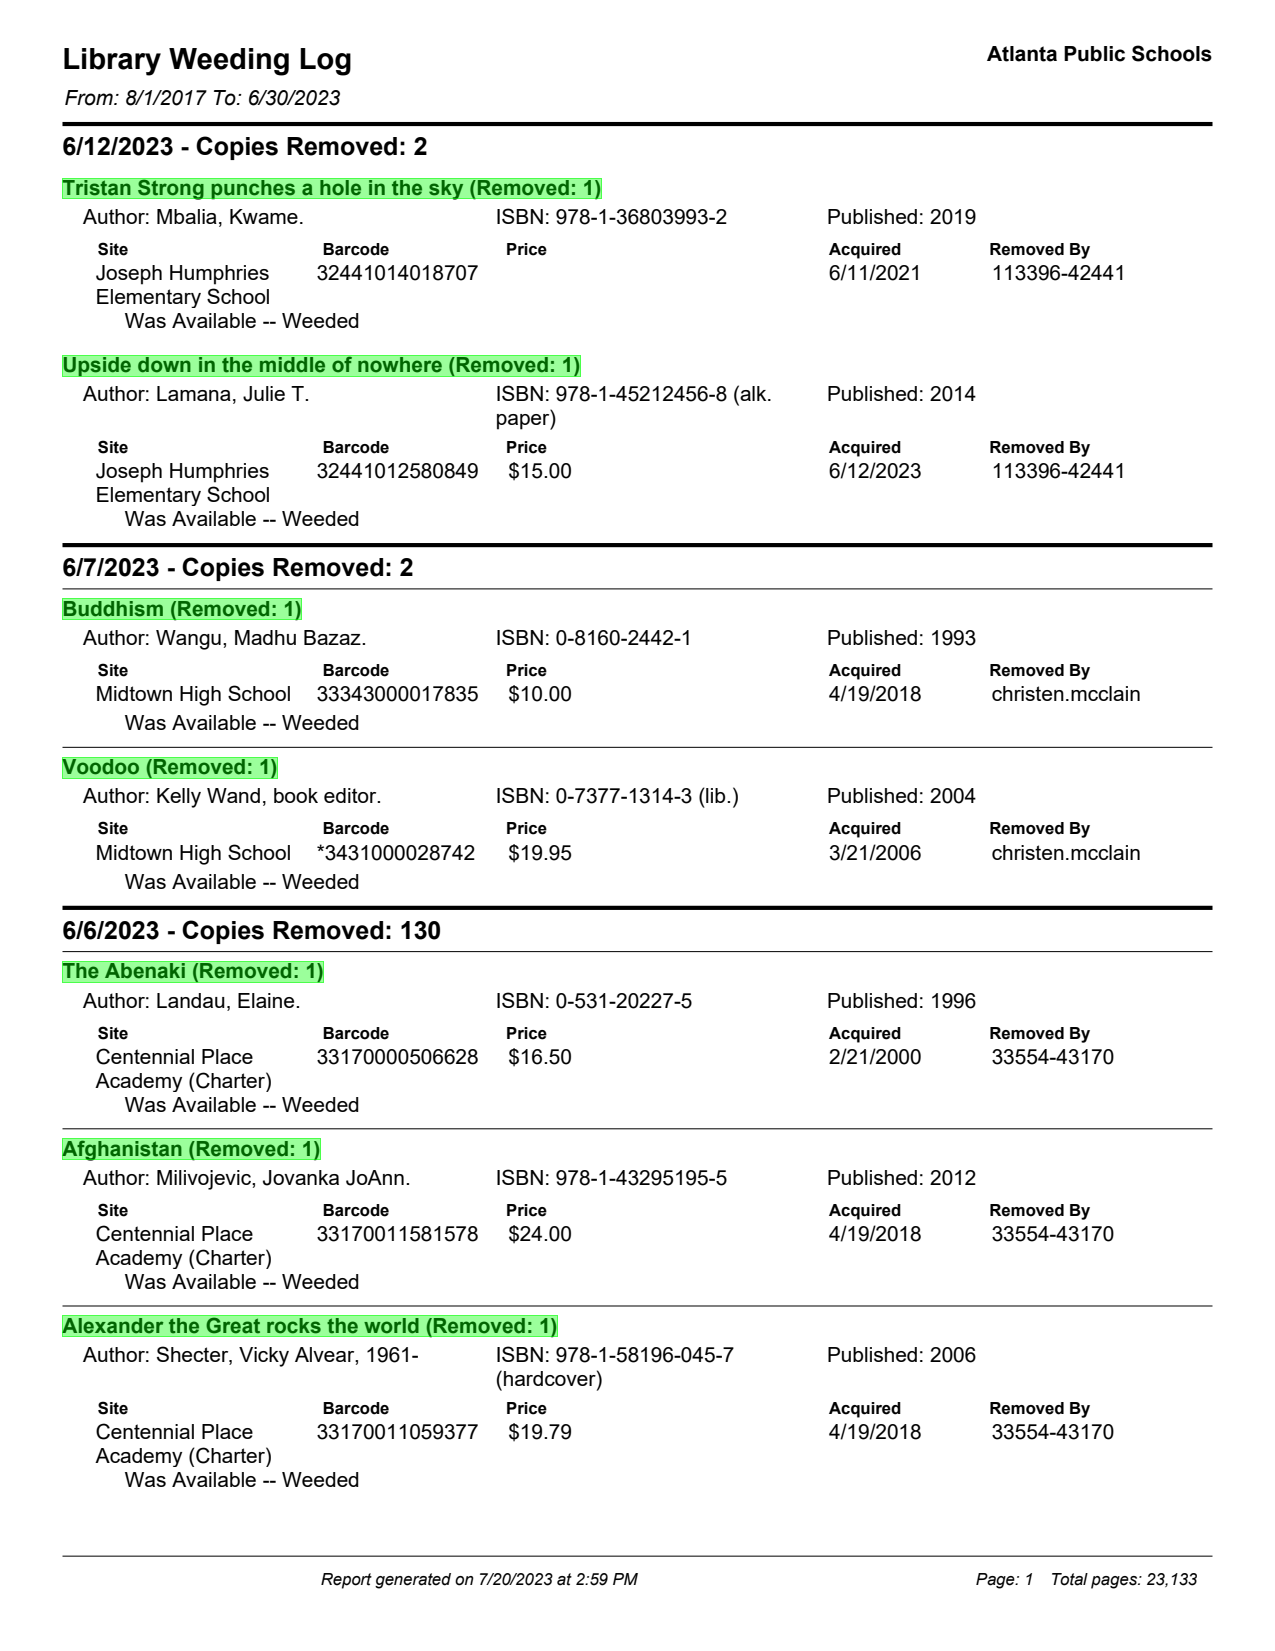

In [2]:
page.find_all('text:contains("(Removed:")').show()

...but it's repeated on each following page, too!

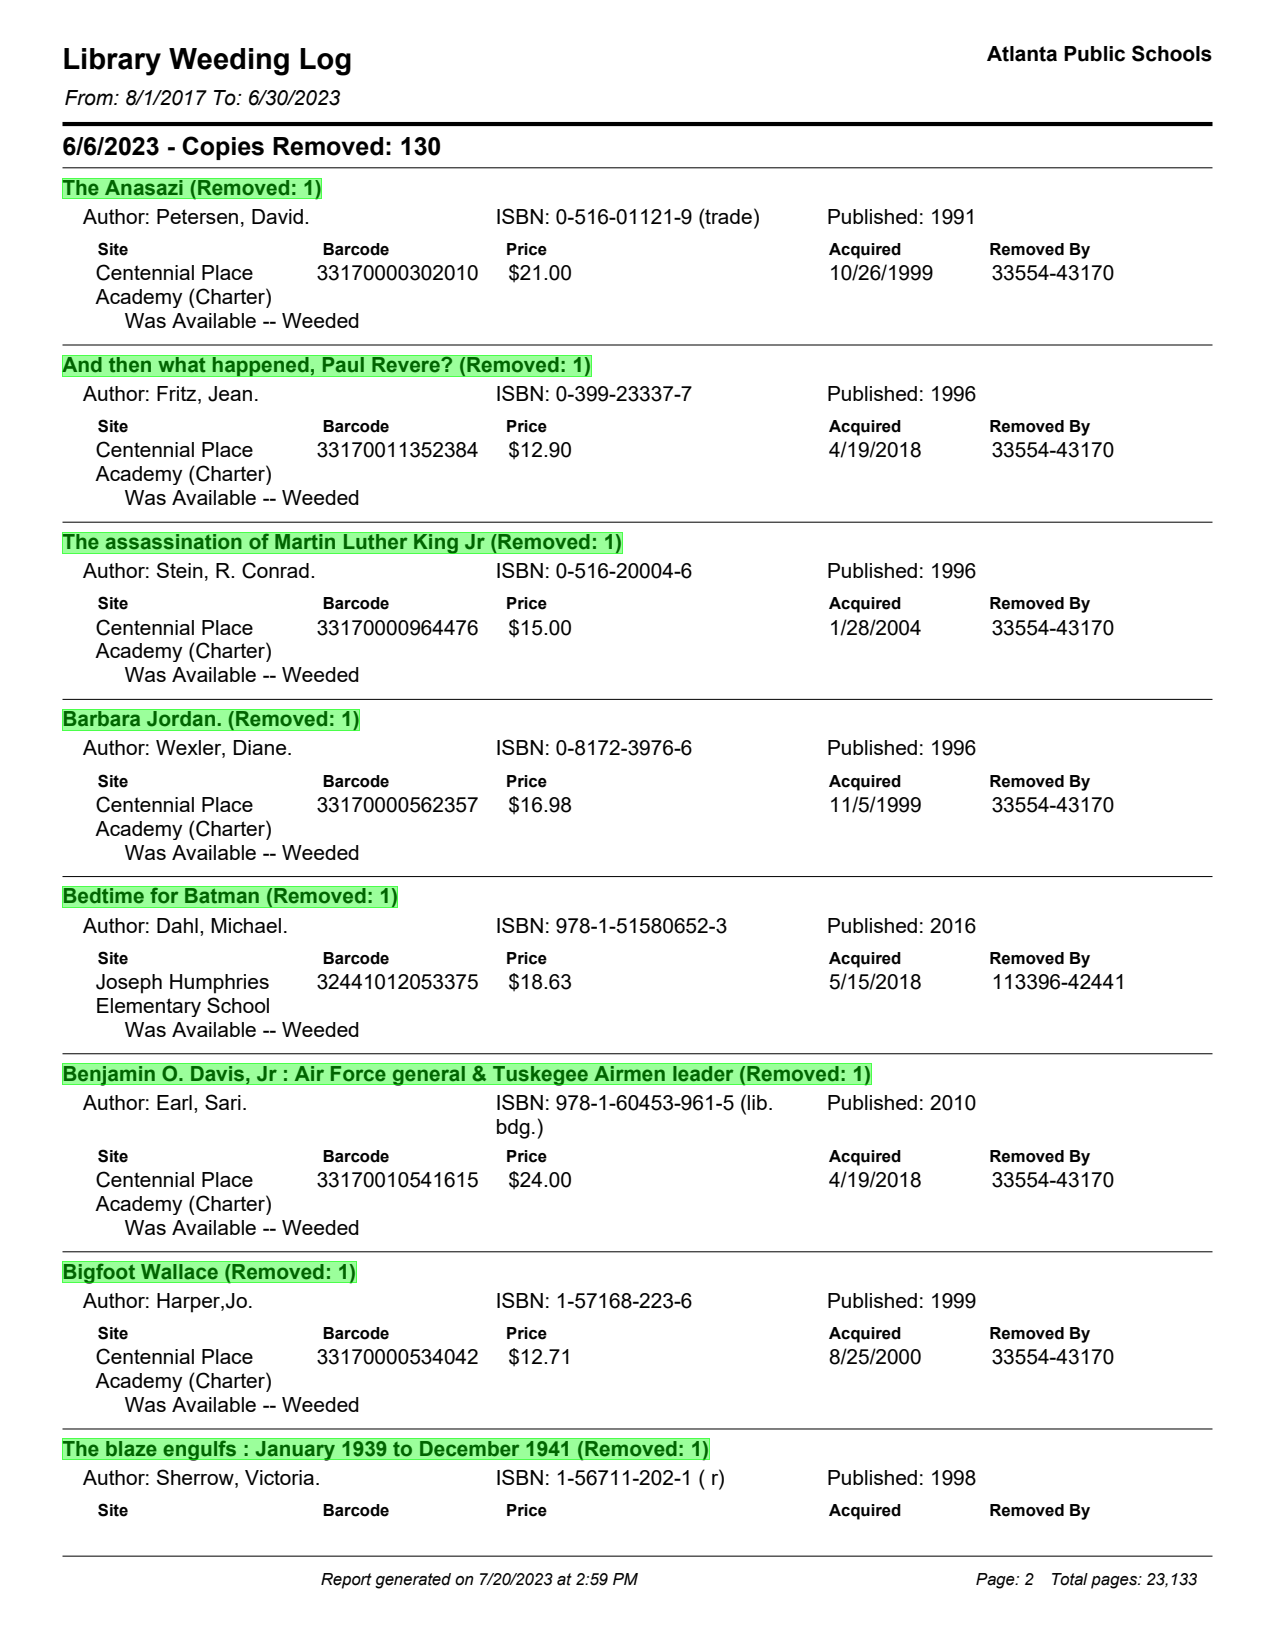

In [3]:
pdf.pages[1].find_all('text:contains("(Removed:")').show()

No problem, you can use `pdf.find_all` the same way to do with a single page - you just can't highlight them with `.show()` the same way.

In [4]:
pdf.find_all('text:contains("(Removed:")')

<ElementCollection[TextElement](count=37)>

You can see there are **37** across the entire PDF.

## Extracting data from elements

If you just want the text, `.extract_text()` will smush it all together, but you can also get it as a list.

In [5]:
titles = pdf.find_all('text:contains("(Removed:")')

titles.extract_each_text()

['Tristan Strong punches a hole in the sky (Removed: 1)',
 'Upside down in the middle of nowhere (Removed: 1)',
 'Buddhism (Removed: 1)',
 'Voodoo (Removed: 1)',
 'The Abenaki (Removed: 1)',
 'Afghanistan (Removed: 1)',
 'Alexander the Great rocks the world (Removed: 1)',
 'The Anasazi (Removed: 1)',
 'And then what happened, Paul Revere? (Removed: 1)',
 'The assassination of Martin Luther King Jr (Removed: 1)',
 'Barbara Jordan. (Removed: 1)',
 'Bedtime for Batman (Removed: 1)',
 'Benjamin O. Davis, Jr : Air Force general & Tuskegee Airmen leader (Removed: 1)',
 'Bigfoot Wallace (Removed: 1)',
 'The blaze engulfs : January 1939 to December 1941 (Removed: 1)',
 'The boys who challenged Hitler : Knud Pedersen and the Churchill Club (Removed: 1)',
 'Brown v. Board of Education (Removed: 1)',
 'The Cahuilla (Removed: 1)',
 'Cambodia (Removed: 1)',
 'Celebrate China (Removed: 1)',
 'Cesar Chavez : a photo-illustrated biography (Removed: 1)',
 'The Cherokee Indians (Removed: 1)',
 'Children

You can also loop through them like a normal list...

In [6]:
for title in titles[:10]:
    print(title.extract_text(), title.page.number)

Tristan Strong punches a hole in the sky (Removed: 1) 1
Upside down in the middle of nowhere (Removed: 1) 1
Buddhism (Removed: 1) 1
Voodoo (Removed: 1) 1
The Abenaki (Removed: 1) 1
Afghanistan (Removed: 1) 1
Alexander the Great rocks the world (Removed: 1) 1
The Anasazi (Removed: 1) 2
And then what happened, Paul Revere? (Removed: 1) 2
The assassination of Martin Luther King Jr (Removed: 1) 2


...but you can also use `.apply` for a little functional-programming flavor.

In [7]:
titles.apply(lambda title: {
    'title': title.extract_text(),
    'page': title.page.number
})

[{'title': 'Tristan Strong punches a hole in the sky (Removed: 1)', 'page': 1},
 {'title': 'Upside down in the middle of nowhere (Removed: 1)', 'page': 1},
 {'title': 'Buddhism (Removed: 1)', 'page': 1},
 {'title': 'Voodoo (Removed: 1)', 'page': 1},
 {'title': 'The Abenaki (Removed: 1)', 'page': 1},
 {'title': 'Afghanistan (Removed: 1)', 'page': 1},
 {'title': 'Alexander the Great rocks the world (Removed: 1)', 'page': 1},
 {'title': 'The Anasazi (Removed: 1)', 'page': 2},
 {'title': 'And then what happened, Paul Revere? (Removed: 1)', 'page': 2},
 {'title': 'The assassination of Martin Luther King Jr (Removed: 1)',
  'page': 2},
 {'title': 'Barbara Jordan. (Removed: 1)', 'page': 2},
 {'title': 'Bedtime for Batman (Removed: 1)', 'page': 2},
 {'title': 'Benjamin O. Davis, Jr : Air Force general & Tuskegee Airmen leader (Removed: 1)',
  'page': 2},
 {'title': 'Bigfoot Wallace (Removed: 1)', 'page': 2},
 {'title': 'The blaze engulfs : January 1939 to December 1941 (Removed: 1)',
  'page':

I think `.map` also works on that front?

## Filtering

You can also filter if you only want some of them. For example, maybe we weren't sure how to pick between the different **Removed:** text blocks.

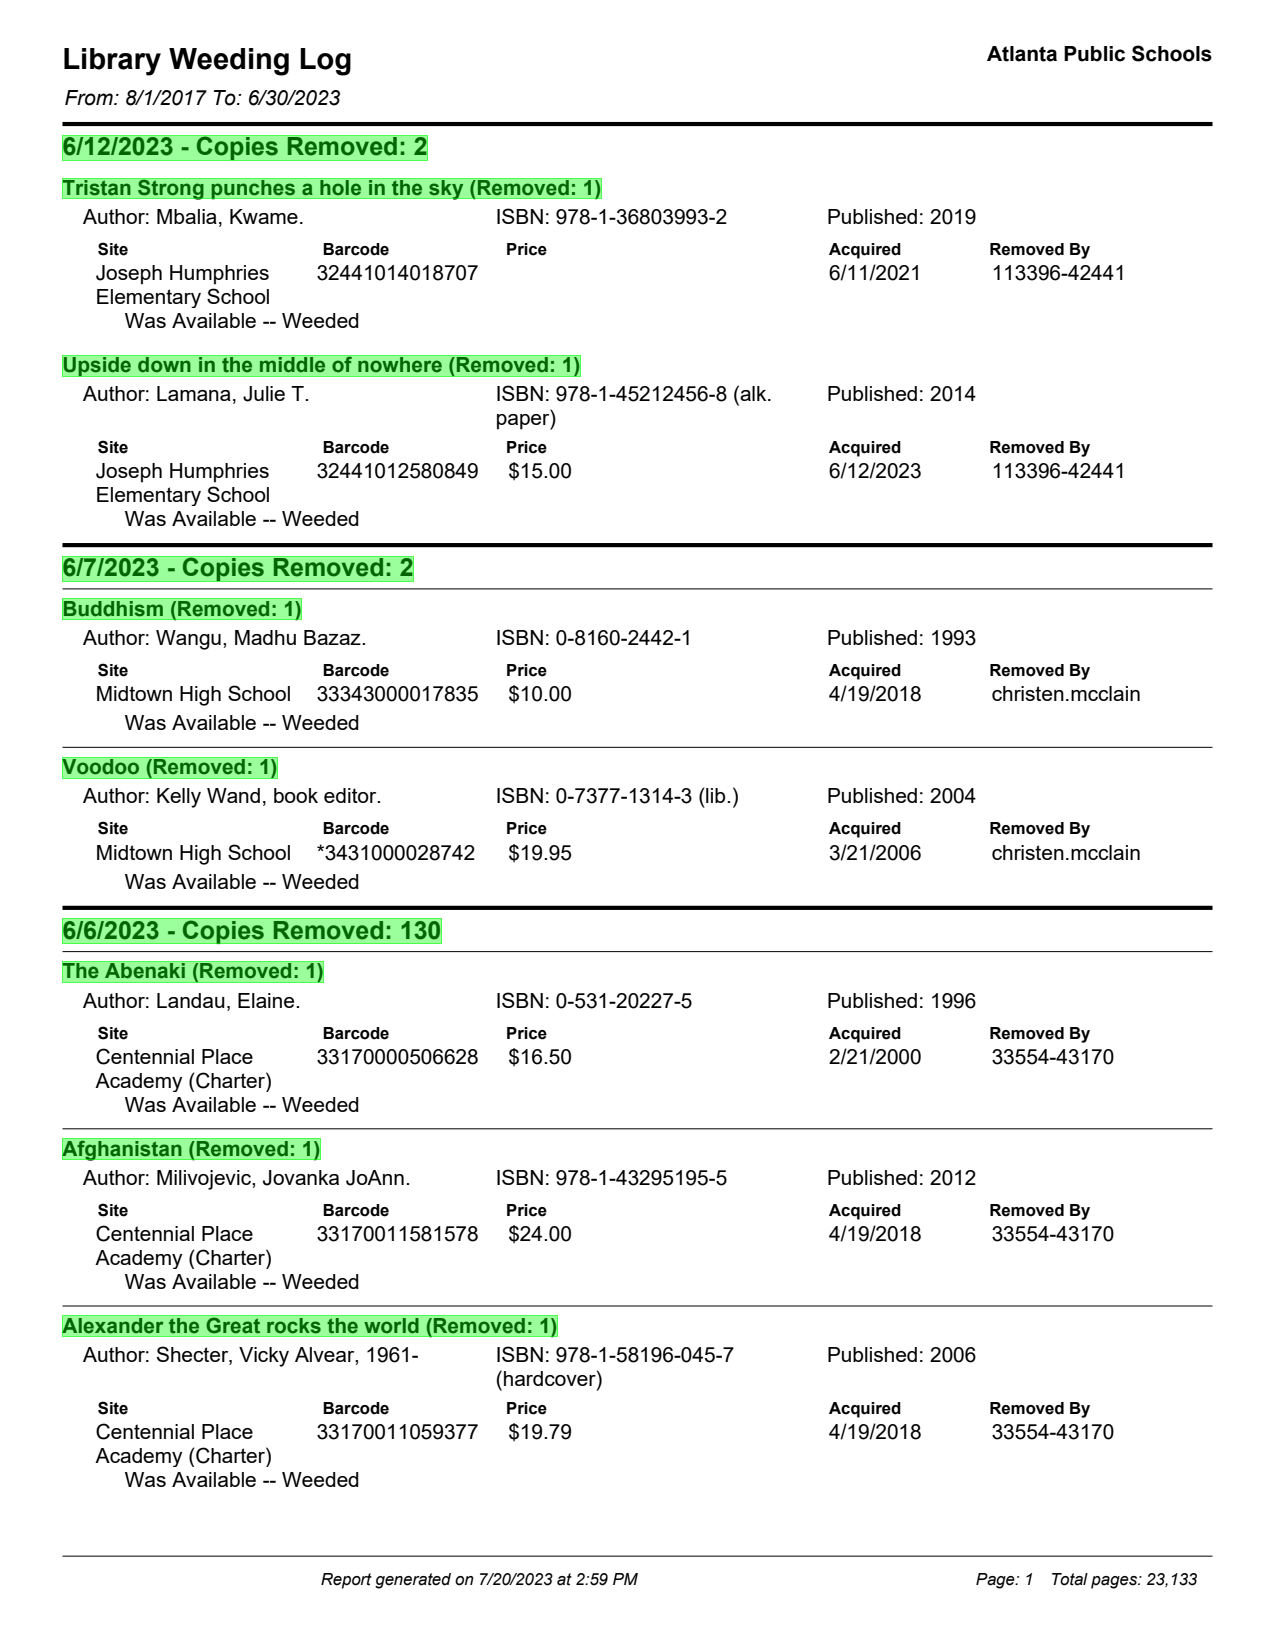

In [8]:
elements = page.find_all('text:contains("Removed:")')
elements.show()

We can filter for the ones that don't say "Copies Removed"

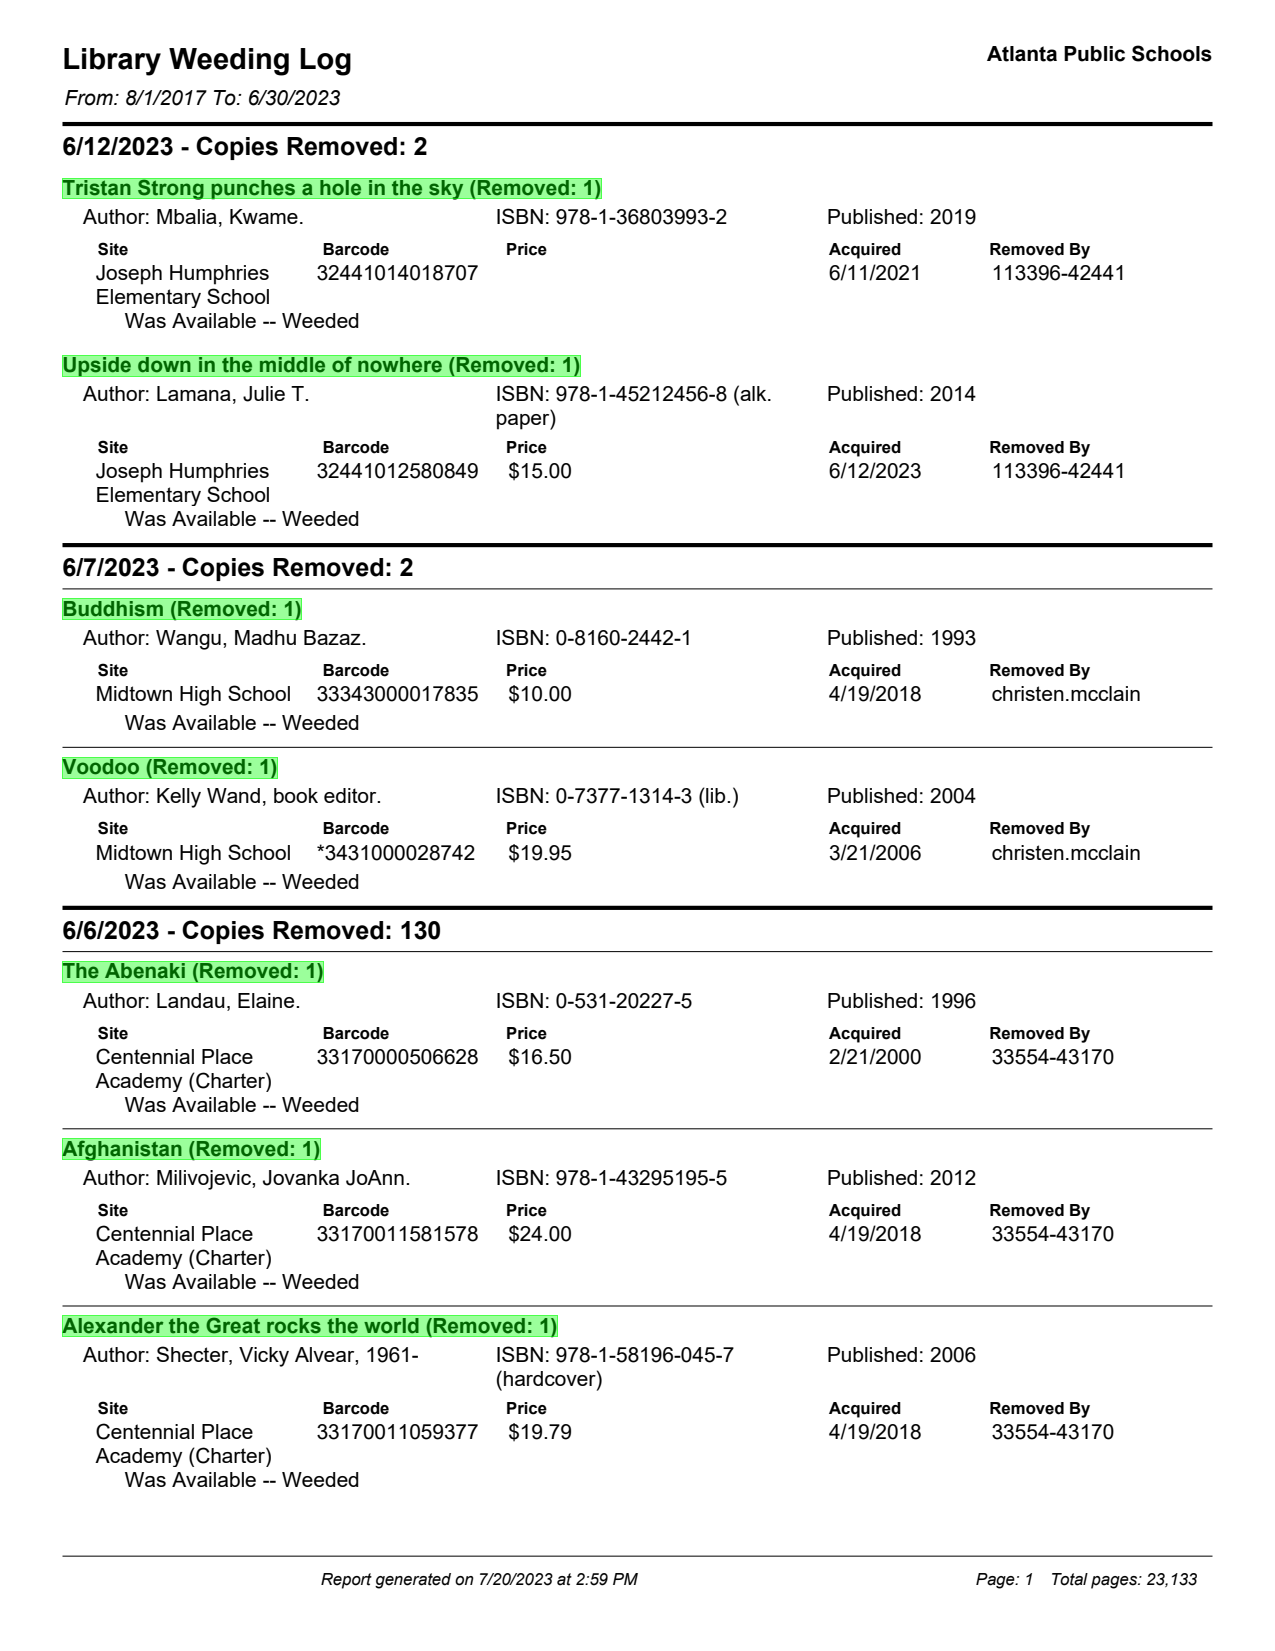

In [9]:
titles = elements.filter(
    lambda element: 'Copies Removed' not in element.extract_text()
)
titles.show()